# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the Data

In [3]:
df1=pd.read_csv('global-fossil-fuel-consumption.csv')
df1.head()

,Entity,Code,Year,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
0,World,OWID_WRL,1800,97,0,0
1,World,OWID_WRL,1810,128,0,0
2,World,OWID_WRL,1820,153,0,0
3,World,OWID_WRL,1830,264,0,0
4,World,OWID_WRL,1840,356,0,0


# Observing trends

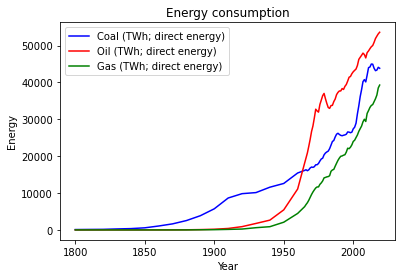

In [4]:
plt.plot('Year','Coal (TWh; direct energy)',data=df1,color='blue')
plt.plot('Year','Oil (TWh; direct energy)',data=df1,color='red')
plt.plot('Year','Gas (TWh; direct energy)',data=df1,color='green')
plt.title('Energy consumption')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [60]:
#energy consumed between 1965-2019
df1['Total Energy']=df1['Coal (TWh; direct energy)'] + df1['Oil (TWh; direct energy)'] + df1['Gas (TWh; direct energy)']
df2=pd.DataFrame()
df2=df1[df1['Year']>1960]
df2.head()

,Entity,Code,Year,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy),Total Energy
17,World,OWID_WRL,1965,16140,18109,6303,40552
18,World,OWID_WRL,1966,16324,19496,6869,42689
19,World,OWID_WRL,1967,16061,20891,7375,44327
20,World,OWID_WRL,1968,16301,22675,8044,47020
21,World,OWID_WRL,1969,16799,24577,8833,50209


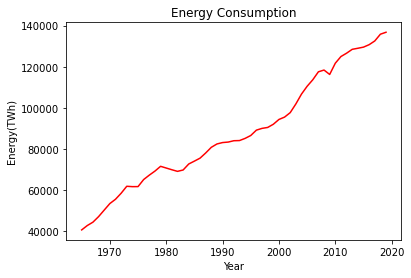

In [6]:
plt.plot('Year','Total Energy',data=df2,color='red')
plt.title('Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Energy(TWh)')
plt.show()

In [7]:
#Countries with their energy consumption values in 2020
df2=pd.read_csv('2020-data.csv')
df2.sort_values('Energy consumed(exajoules)',inplace=True)
df2.head()

,Country,Energy consumed(exajoules)
19,Spain,4.97
18,Thailand,5.12
17,Australia,5.57
16,Italy,5.86
15,Turkey,6.29


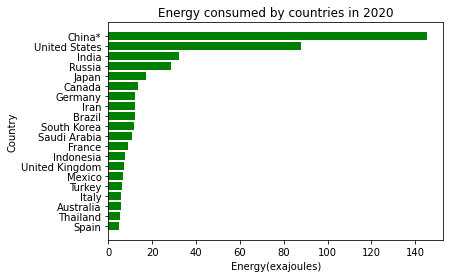

In [8]:
plt.barh('Country','Energy consumed(exajoules)',data=df2,color='green')
plt.title('Energy consumed by countries in 2020')
plt.xlabel('Energy(exajoules)')
plt.ylabel('Country')
plt.show()

# Analysing the next dataset for insights

In [9]:
#World energy consumption data
df3=pd.read_csv('World Energy Consumption.csv')
df3.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df4=df3[['country','year','coal_prod_change_twh','gas_prod_change_twh','oil_prod_change_twh']]
df4=df4[df4['year']>1964]
df4.head()

,country,year,coal_prod_change_twh,gas_prod_change_twh,oil_prod_change_twh
65,Afghanistan,1965,0.252,NaN,NaN
66,Afghanistan,1966,0.147,NaN,NaN
67,Afghanistan,1967,-0.090,NaN,NaN
68,Afghanistan,1968,-0.212,NaN,NaN
69,Afghanistan,1969,0.090,NaN,NaN


In [17]:
#Replace the NaN values with 0 and find the total annual change in energy production in twh by coal, oil and gas
df4=df4.fillna(0)
df4['energy_prod_change_twh']=df4['coal_prod_change_twh'] + df4['gas_prod_change_twh'] + df4['oil_prod_change_twh']
df4=df4[['country','energy_prod_change_twh']]
df4=df4.reset_index(drop=True)
df4.head()

,country,energy_prod_change_twh
0,Afghanistan,0.252
1,Afghanistan,0.147
2,Afghanistan,-0.090
3,Afghanistan,-0.212
4,Afghanistan,0.090


In [23]:
#Group by country to find the average change in energy production between 1965-2019
df5=pd.DataFrame()
df5=df4.groupby('country').mean()
df5=df5.round(2)
df5=df5.reset_index()
df5.head()

,country,energy_prod_change_twh
0,Afghanistan,0.16
1,Africa,126.61
2,Albania,0.10
3,Algeria,23.21
4,American Samoa,0.00


In [48]:
df6=df5.sort_values('energy_prod_change_twh',ascending=False)
df6=df6[(df6['country']!='World') & (df6['country']!='Africa') & (df6['country']!='USSR') & (df6['country']!='Asia Pacific') & (df6['country']!='OPEC') & (df6['country']!='Middle East') & (df6['country']!='CIS') & (df6['country']!='North America')]
df6.head()

,country,energy_prod_change_twh
43,China,400.40
180,Russia,199.37
227,United States,118.58
189,Saudi Arabia,114.44
99,Indonesia,91.22


In [55]:
#df6=df6.iloc[0:5]
df6.iloc[2,0]='USA'
df6.head()

,country,energy_prod_change_twh
43,China,400.40
180,Russia,199.37
227,USA,118.58
189,Saudi Arabia,114.44
99,Indonesia,91.22


# Plotting the change in energy production

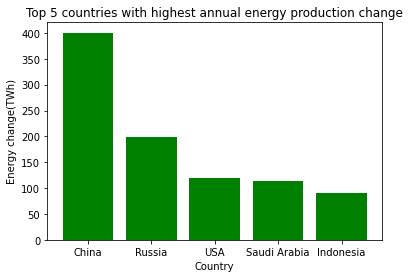

In [59]:
plt.bar('country','energy_prod_change_twh',data=df6,color='green')
plt.title('Top 5 countries with highest annual energy production change')
plt.xlabel('Country')
plt.ylabel('Energy change(TWh)')
plt.show()